In [8]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import keras

In [9]:
# Read the CSV files
train_df = pd.read_csv('../datasets/train.csv')
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,164,177,163,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,141,113,9,0,0,0
29997,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
29998,4,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0


In [10]:
# Assuming the first column is the label
train_labels = train_df.iloc[:, 0].values
train_images = train_df.iloc[:, 1:].values

# Reshape and normalize the image data
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
train_images

# Convert labels to categorical
train_labels = to_categorical(train_labels)
train_labels

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [11]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64)


Epoch 1/10


2024-01-31 05:05:47.569916: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 94080000 exceeds 10% of free system memory.


469/469 [==============================] - 10s 19ms/step - loss: 0.1970 - accuracy: 0.9385
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0887 - accuracy: 0.9727
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0709 - accuracy: 0.9769
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0591 - accuracy: 0.9810
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0500 - accuracy: 0.9840
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0444 - accuracy: 0.9854
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0393 - accuracy: 0.9863
Epoch 8/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0351 - accuracy: 0.9876
Epoch 9/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0308 - accuracy: 0.9887
Epoch 10/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0272 - accuracy: 

In [12]:
test_df = pd.read_csv('../datasets/test.csv')

# Assuming the first column is the label
test_labels = test_df.iloc[:, 0].values
test_images = test_df.iloc[:, 1:].values

# Reshape and normalize the image data
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255

# Convert labels to categorical
test_labels = to_categorical(test_labels)


# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

157/157 [==============================] - 1s 3ms/step - loss: 0.0532 - accuracy: 0.9822
Test accuracy: 0.982200026512146


1/1 [==============================] - 0s 73ms/step


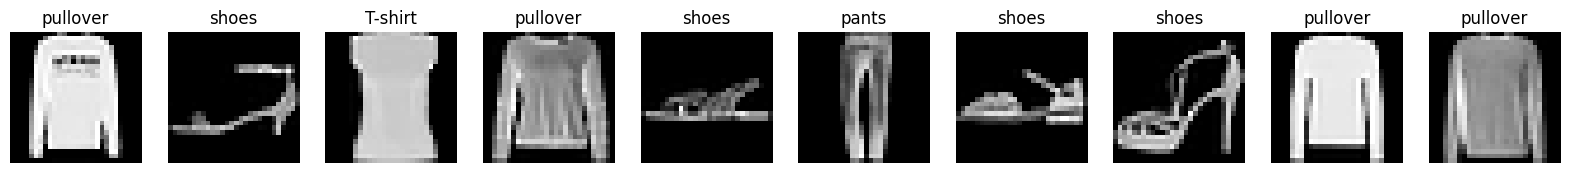

In [13]:
# Select a random sample of images from the test set
num_samples = 10
indices = np.random.choice(range(len(test_images)), num_samples, replace=False)
sample_images = test_images[indices]

# Predict labels
predicted = model.predict(sample_images)
predicted_labels = np.argmax(predicted, axis=1)

class_dict = {0:'T-shirt',1:'pants',2:'pullover',3:'shoes',4:'Bag'}
# Display images and predictions
fig, axes = plt.subplots(1, num_samples, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'{class_dict.get(predicted_labels[i])}')
    ax.axis('off')
plt.show()


In [14]:
model.save('../model/location.keras')